Algoritmo K-means (Core)

El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset «Mall Customer Segmentation Data» de Kaggle.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

# Carga del Dataset:
* El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
* Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.

In [5]:
data = pd.read_csv('../data/Mall_Customers.csv')

# Selección de Variables:
* Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.

In [6]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Implementación de K-means:
* Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
* Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


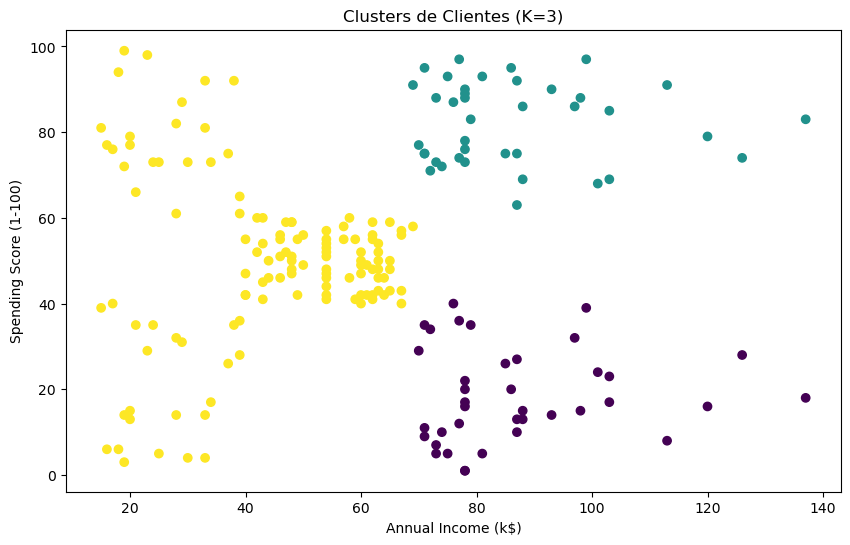

c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


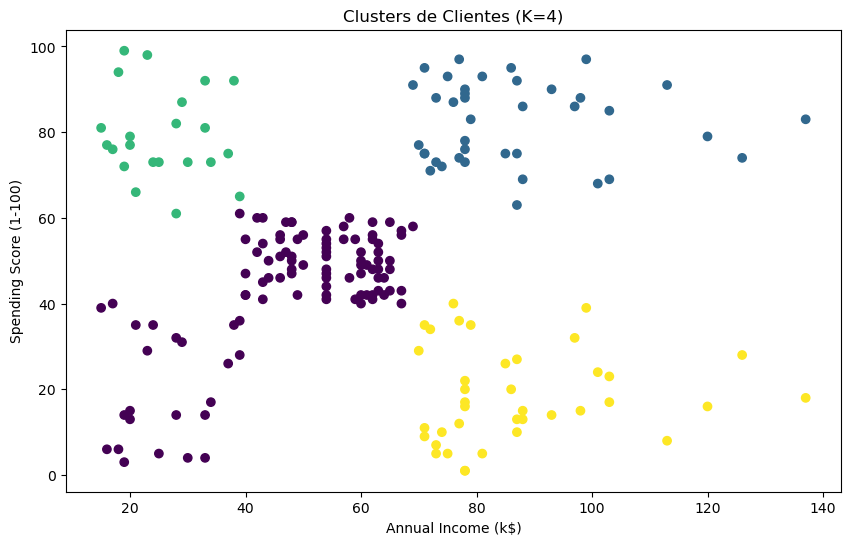

c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


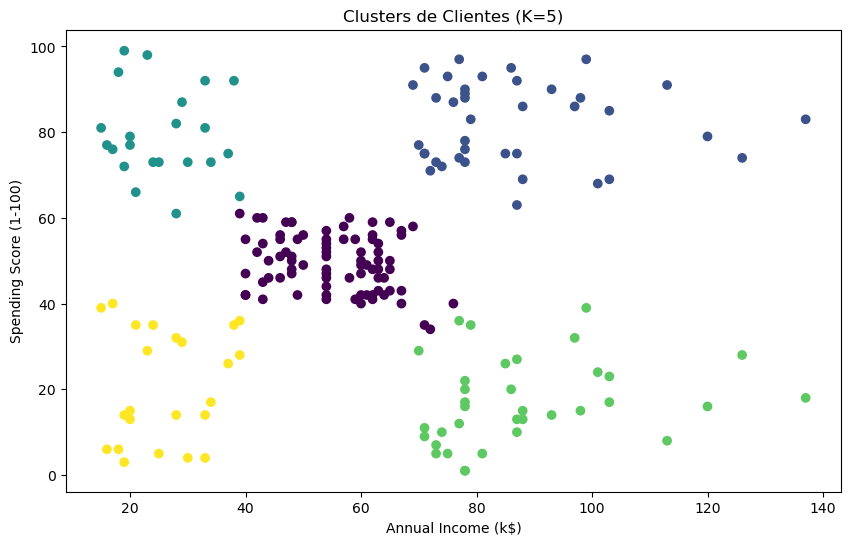

In [11]:
# Definir los valores de K que queremos probar
k_values = [3, 4, 5]

# Crear gráficos para cada valor de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    data[f'Cluster_{k}'] = kmeans.labels_
    
    # Visualizar los clusters
    plt.figure(figsize=(10,6))
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data[f'Cluster_{k}'], cmap='viridis')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'Clusters de Clientes (K={k})')
    plt.show()


#  Elbow Method:
* Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.

c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

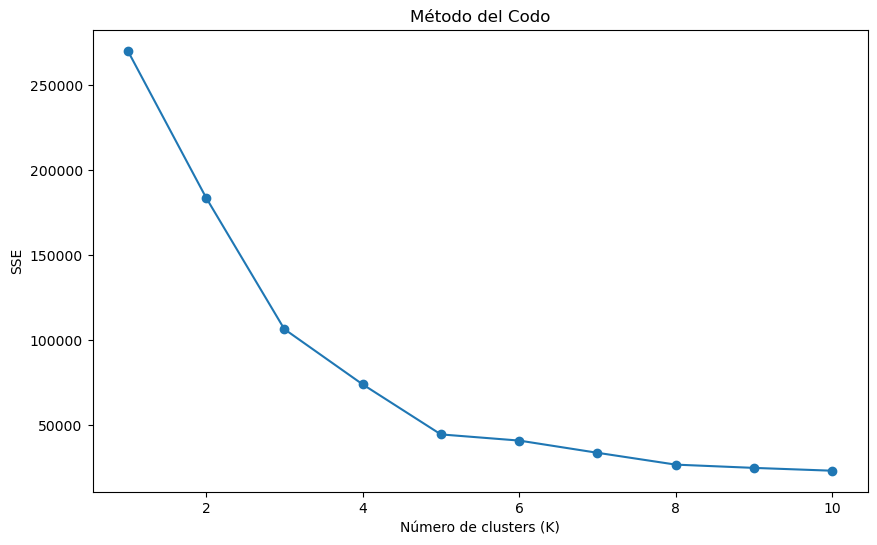

In [14]:
# Lista para almacenar la suma de los errores cuadrados
sse = []

# Probar diferentes valores de K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()


# Interpretación de Clusters:
* Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

Se determina que el numero optimo de clusters es de 5. Cada grupo tiene en comun el rango de sueldo anual y su rango de spending score, esta informacion es muy util para ofrecer a cada grupo productos y servicios personalizados por ejemplo, dividir los productos economicos, gama media y gama alta para publicitarlos respectivamente a cada grupo y asi aumentar el interes de los clientes.

# 6. Análisis de Resultados:
* Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?

Analizando los clusters se reconoce un patron o comportamiento peculiar donde se observa que aunque haya 5 clusters bien marcados, se puede subdividir a los grupos en 3 segun su sueldo anual y puntaje de gastos. El primer subgrupo que tiene un ingreso bajo tiene 2 clusters, uno con puntajes de gastos muy bajos y el otro con un puntajes muy altos, lo cual se repite para el tercer subgrupo de gente que tiene mayores ingresos, es decir 2 clusters extremizados. El tercer subgrupo que tiene un sueldo anual promedio coherentemente tambien tienen un puntaje promedio, lo cual deberia ser el comportamiento normal.